### 라이브러리 및 데이터 가져오기

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
import matplotlib
matplotlib.rcParams['font.family'] = 'AppleGothic' # window
matplotlib.rcParams['font.size'] = 10 # 글자 크기

import warnings 
warnings.filterwarnings('ignore')

In [51]:
train = pd.read_csv("./datasets/train.csv")
test = pd.read_csv("./datasets/test.csv")
bts = pd.read_csv("./datasets/bus_bts.csv")

In [2]:
# path = '/Users/minji/Desktop/data/229255_bus_riders_at_rush_hour_data/'
# train = pd.read_csv(path + "train.csv")
# test = pd.read_csv(path + "test.csv")
# bts = pd.read_csv(path + "bus_bts.csv")

## 데이터 훝어보기

In [7]:
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [8]:
test.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff
0,415423,2019-10-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,4.0,4.0,7.0,2.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,415424,2019-10-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,6.0,6.0,1.0,8.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
2,415425,2019-10-01,4270000,시외,432,정존마을,33.48181,126.47352,2.0,4.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,415426,2019-10-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,1.0,11.0,18.0,8.0,26.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
4,415427,2019-10-01,4270000,시내,1636,롯데호텔,33.24872,126.41032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [9]:
bts.head()

,user_card_id,bus_route_id,vhc_id,geton_date,geton_time,geton_station_code,geton_station_name,getoff_date,getoff_time,getoff_station_code,getoff_station_name,user_category,user_count
0,1.010010e+15,23000000,149793674,2019-09-10,06:34:45,360,노형오거리,2019-09-10,07:10:31,592.0,화북초등학교,1,1
1,1.010010e+15,23000000,149793674,2019-09-10,06:34:58,360,노형오거리,2019-09-10,06:56:27,3273.0,고산동산(광양방면),1,1
2,1.019160e+15,21420000,149793535,2019-09-10,07:19:07,2495,동광환승정류장4(제주방면),2019-09-10,07:40:29,431.0,정존마을,4,1
3,1.019150e+15,21420000,149793512,2019-09-09,09:14:47,3282,대정환승정류장(대정읍사무소),2019-09-09,10:02:46,431.0,정존마을,1,1
4,1.010010e+15,21420000,149793512,2019-09-09,09:28:53,2820,삼정지에듀,2019-09-09,10:21:37,2972.0,제주국제공항(종점),4,1


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415423 entries, 0 to 415422
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             415423 non-null  int64  
 1   date           415423 non-null  object 
 2   bus_route_id   415423 non-null  int64  
 3   in_out         415423 non-null  object 
 4   station_code   415423 non-null  int64  
 5   station_name   415423 non-null  object 
 6   latitude       415423 non-null  float64
 7   longitude      415423 non-null  float64
 8   6~7_ride       415423 non-null  float64
 9   7~8_ride       415423 non-null  float64
 10  8~9_ride       415423 non-null  float64
 11  9~10_ride      415423 non-null  float64
 12  10~11_ride     415423 non-null  float64
 13  11~12_ride     415423 non-null  float64
 14  6~7_takeoff    415423 non-null  float64
 15  7~8_takeoff    415423 non-null  float64
 16  8~9_takeoff    415423 non-null  float64
 17  9~10_takeoff   415423 non-nul

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228170 entries, 0 to 228169
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             228170 non-null  int64  
 1   date           228170 non-null  object 
 2   bus_route_id   228170 non-null  int64  
 3   in_out         228170 non-null  object 
 4   station_code   228170 non-null  int64  
 5   station_name   228170 non-null  object 
 6   latitude       228170 non-null  float64
 7   longitude      228170 non-null  float64
 8   6~7_ride       228170 non-null  float64
 9   7~8_ride       228170 non-null  float64
 10  8~9_ride       228170 non-null  float64
 11  9~10_ride      228170 non-null  float64
 12  10~11_ride     228170 non-null  float64
 13  11~12_ride     228170 non-null  float64
 14  6~7_takeoff    228170 non-null  float64
 15  7~8_takeoff    228170 non-null  float64
 16  8~9_takeoff    228170 non-null  float64
 17  9~10_takeoff   228170 non-nul

In [76]:
bts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2409414 entries, 0 to 2409413
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   user_card_id         float64
 1   bus_route_id         int64  
 2   vhc_id               int64  
 3   geton_date           object 
 4   geton_time           object 
 5   geton_station_code   int64  
 6   geton_station_name   object 
 7   getoff_date          object 
 8   getoff_time          object 
 9   getoff_station_code  float64
 10  getoff_station_name  object 
 11  user_category        int64  
 12  user_count           int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 239.0+ MB


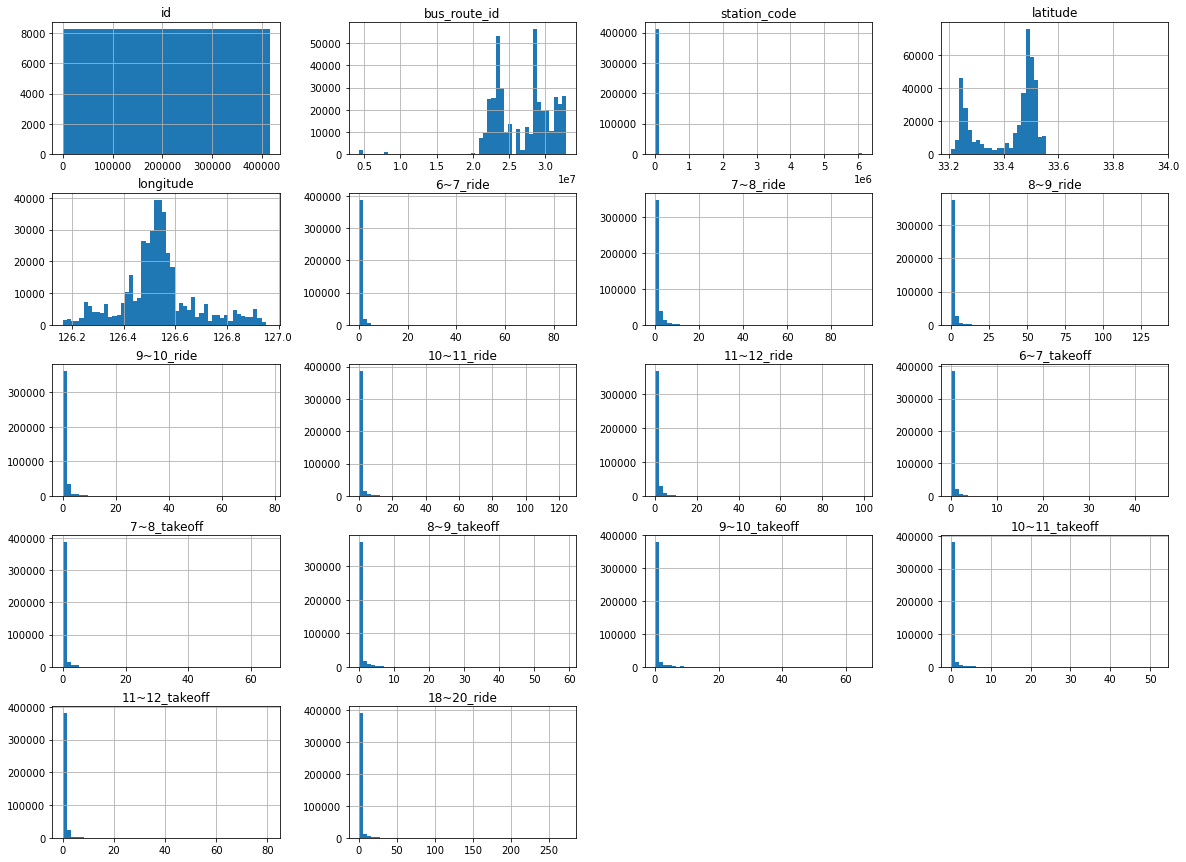

In [15]:
h = train.hist(bins=50, figsize=(20, 15))

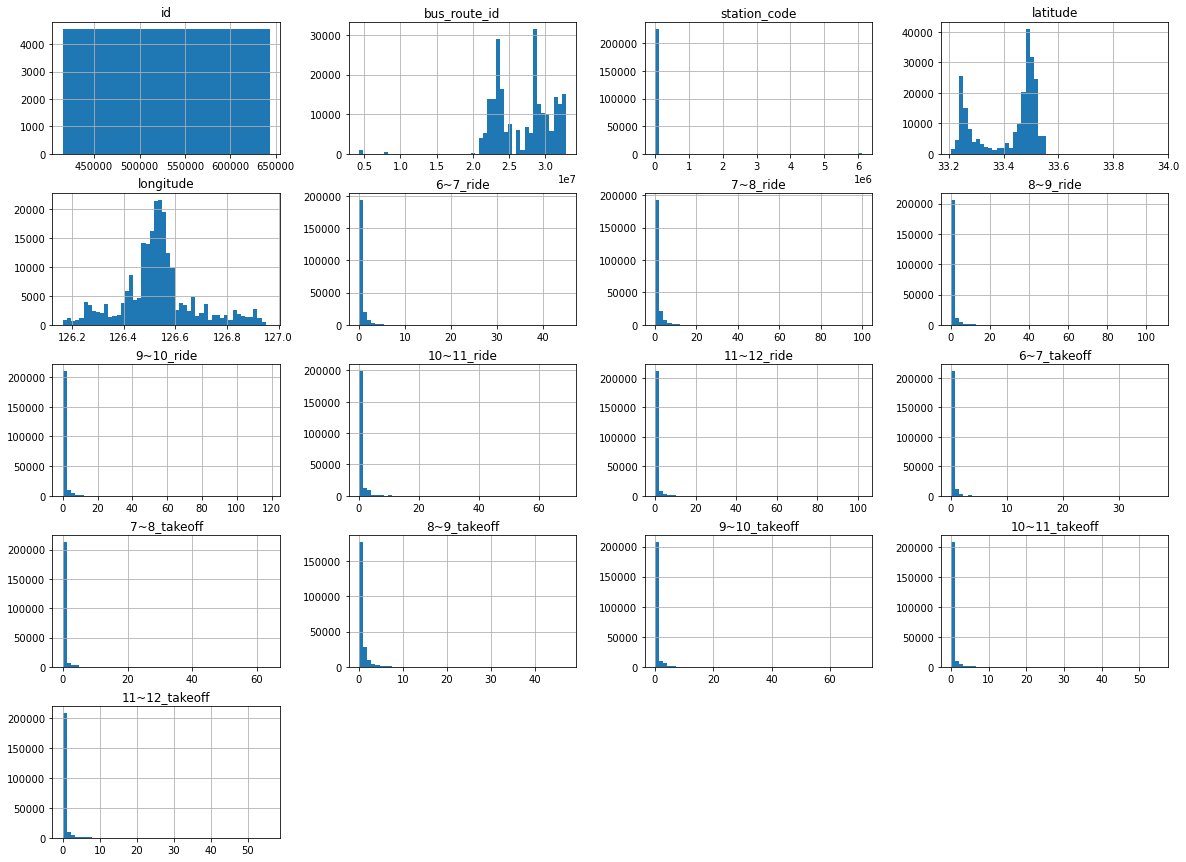

In [16]:
h = test.hist(bins=50, figsize=(20, 15))

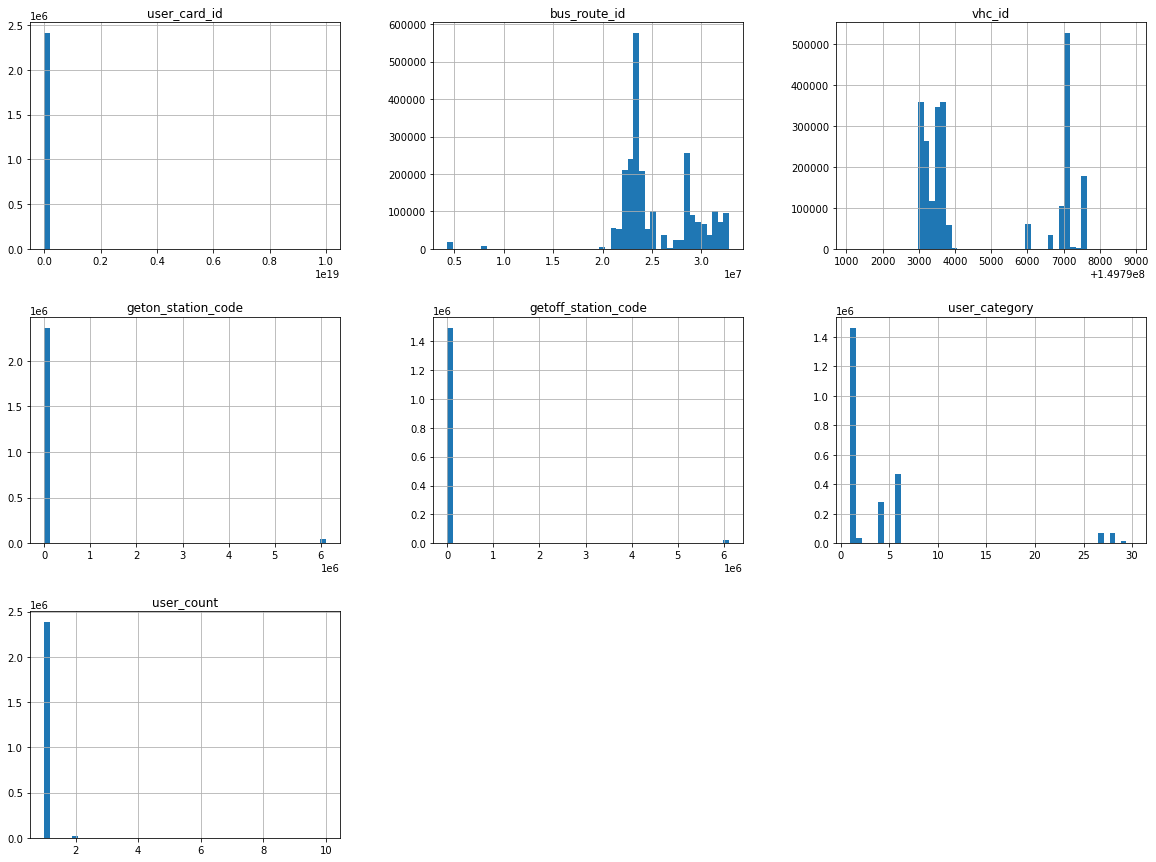

In [17]:
h = bts.hist(bins=50, figsize=(20, 15))

### 시내/시외 비율

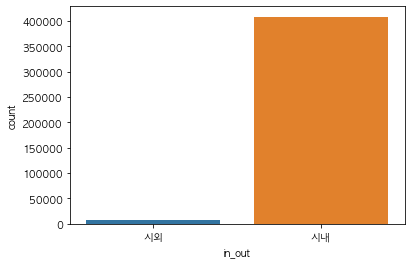

In [22]:
import seaborn as sns
g = sns.countplot(train['in_out'])

### 기간 살펴보기

In [9]:
train['date']

0         2019-09-01
1         2019-09-01
2         2019-09-01
3         2019-09-01
4         2019-09-01
             ...    
415418    2019-09-30
415419    2019-09-30
415420    2019-09-30
415421    2019-09-30
415422    2019-09-30
Name: date, Length: 415423, dtype: object

### bus_bts 살펴보기

In [10]:
#bus route는 총 630개
len(bts['bus_route_id'].unique())

630

In [11]:
#route별 정류장 수
bts[['bus_route_id','geton_station_code']].groupby('bus_route_id').count().sort_values(by = 'geton_station_code', ascending = False).head(10)

,geton_station_code
bus_route_id,
23610000,62522
23620000,58407
23570000,47603
22520000,47261
22530000,46933
23580000,45124
25010000,31518
25000000,29693
28690000,28915


In [12]:
# 승차 기록은 있는데 하차 기록이 없는것이 있음. 
bts.isnull().sum()

user_card_id                0
bus_route_id                0
vhc_id                      0
geton_date                  0
geton_time                  0
geton_station_code          0
geton_station_name         49
getoff_date            895736
getoff_time            895736
getoff_station_code    895736
getoff_station_name    895775
user_category               0
user_count                  0
dtype: int64

### 인기있는 노선 알아보기

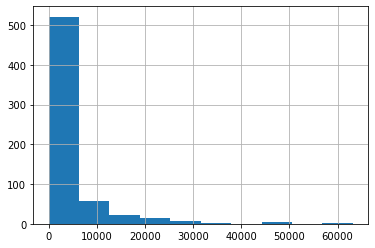

In [13]:
data = bts.groupby('bus_route_id').sum()['user_count'].sort_values(ascending = False)
data.hist(bins = 10)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

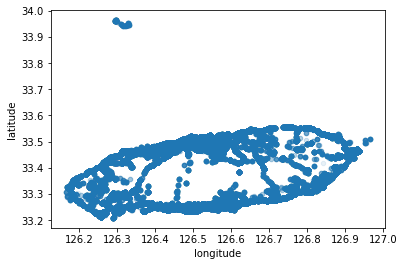

In [20]:
train.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

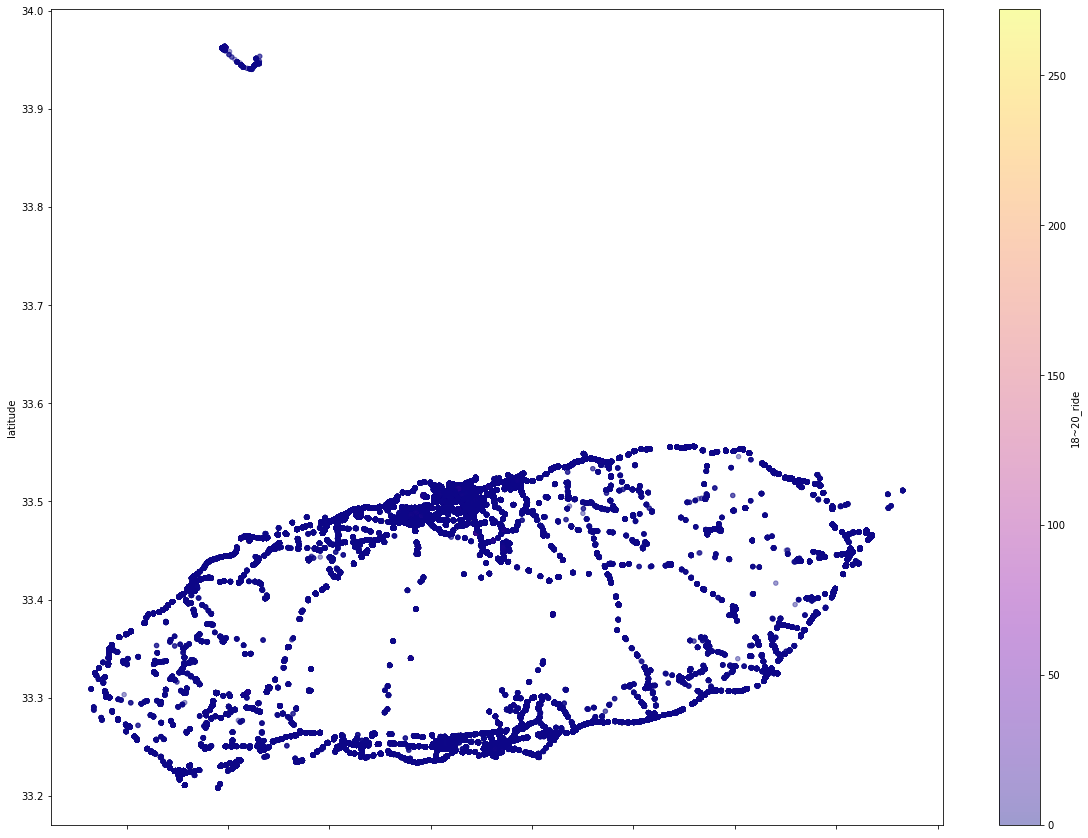

In [100]:
train.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c = '18~20_ride', cmap = 'plasma', figsize=(20,15)) # longitude(경도) : 동서, # latitude(위도): 남북

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

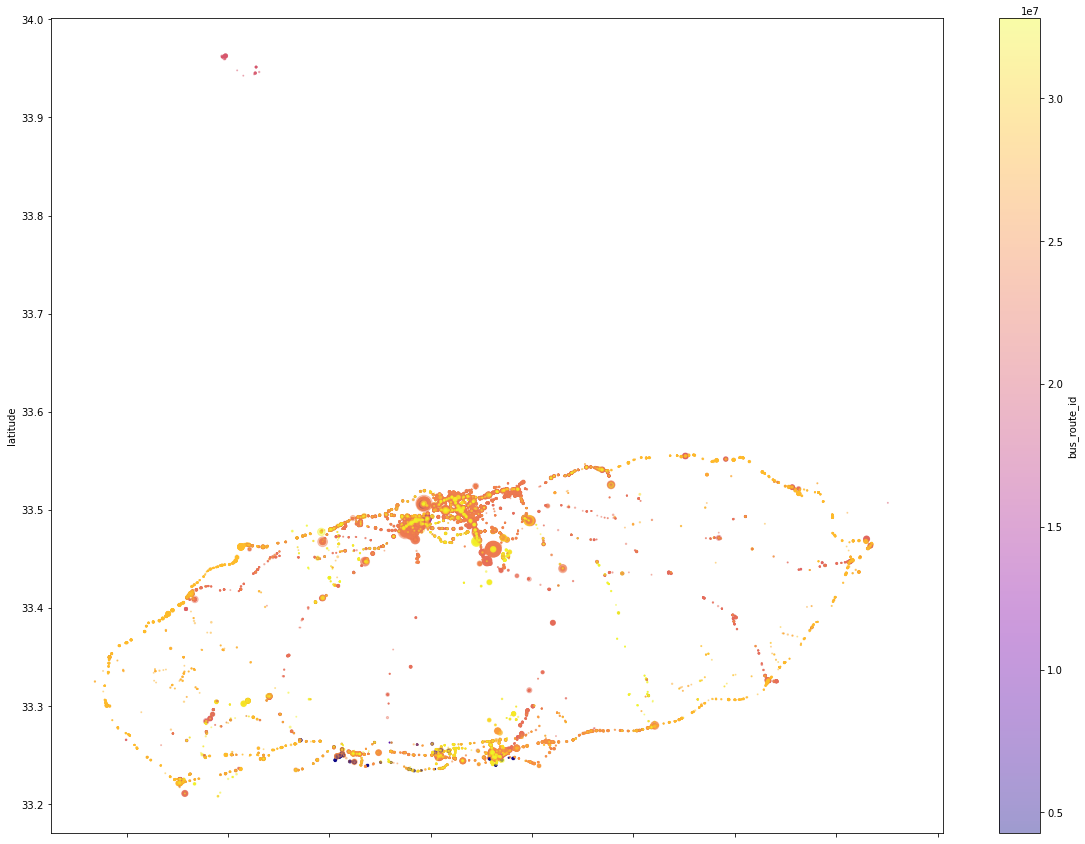

In [25]:
train.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c = 'bus_route_id', cmap = 'plasma', s = train['18~20_ride'], figsize=(20,15))

In [32]:
train["date"] = pd.to_datetime(train["date"])

In [33]:
train["weekday"] = train["date"].dt.weekday

In [34]:
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,data,weekday
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-09-01,6
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2019-09-01,6
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2019-09-01,6
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,2019-09-01,6
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2019-09-01,6


In [37]:
df = train.corr()

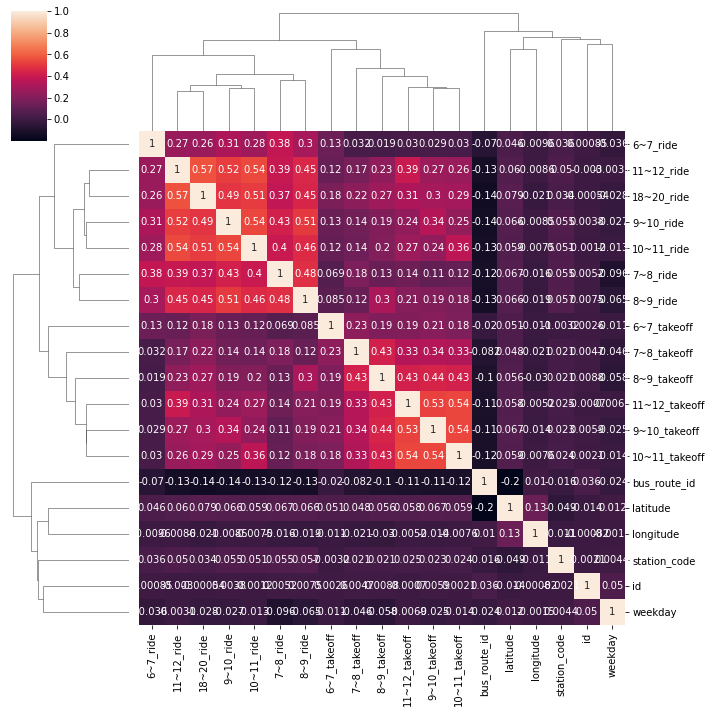

In [39]:
sns.clustermap(df, annot=True)

In [31]:
data = pd.melt(train, id_vars = ['id', 'date', 'bus_route_id', 'in_out', 'station_code', 'station_name', 'latitude', 'longitude', 'weekday', '18~20_ride'])
data

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,weekday,18~20_ride,variable,value
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,6,0.0,6~7_ride,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,6,5.0,6~7_ride,1.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,6,2.0,6~7_ride,1.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,6,53.0,6~7_ride,0.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,6,0.0,6~7_ride,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4985071,415418,2019-09-30,32820000,시내,1129,한림환승정류장(한림리),33.41437,126.26336,0,0.0,11~12_takeoff,0.0
4985072,415419,2019-09-30,32820000,시내,1564,제주시외버스터미널,33.49946,126.51479,0,0.0,11~12_takeoff,0.0
4985073,415420,2019-09-30,32820000,시내,2322,해병부대,33.23100,126.26273,0,0.0,11~12_takeoff,0.0
4985074,415421,2019-09-30,32820000,시내,3291,애월환승정류장(애월리),33.46483,126.31870,0,0.0,11~12_takeoff,0.0


In [32]:
data["date"] = pd.to_datetime(data["date"])
data["weekday"] = data["date"].dt.weekday
data

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,weekday,18~20_ride,variable,value
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,6,0.0,6~7_ride,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,6,5.0,6~7_ride,1.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,6,2.0,6~7_ride,1.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,6,53.0,6~7_ride,0.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,6,0.0,6~7_ride,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4985071,415418,2019-09-30,32820000,시내,1129,한림환승정류장(한림리),33.41437,126.26336,0,0.0,11~12_takeoff,0.0
4985072,415419,2019-09-30,32820000,시내,1564,제주시외버스터미널,33.49946,126.51479,0,0.0,11~12_takeoff,0.0
4985073,415420,2019-09-30,32820000,시내,2322,해병부대,33.23100,126.26273,0,0.0,11~12_takeoff,0.0
4985074,415421,2019-09-30,32820000,시내,3291,애월환승정류장(애월리),33.46483,126.31870,0,0.0,11~12_takeoff,0.0


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5815922 entries, 0 to 5815921
Data columns (total 12 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   bus_route_id  int64         
 3   in_out        object        
 4   station_code  int64         
 5   station_name  object        
 6   latitude      float64       
 7   longitude     float64       
 8   18~20_ride    float64       
 9   variable      object        
 10  value         object        
 11  weekday       int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 532.5+ MB


In [46]:
df = data.corr()
df

,id,bus_route_id,station_code,latitude,longitude,18~20_ride,weekday
id,1.000000,0.035830,-0.002053,-0.013783,-0.000816,-0.000544,0.050445
bus_route_id,0.035830,1.000000,-0.015897,-0.196758,0.010187,-0.143702,-0.023889
station_code,-0.002053,-0.015897,1.000000,-0.048951,-0.011303,0.034360,0.004411
latitude,-0.013783,-0.196758,-0.048951,1.000000,0.134208,0.079261,0.011928
longitude,-0.000816,0.010187,-0.011303,0.134208,1.000000,-0.021368,-0.001481
18~20_ride,-0.000544,-0.143702,0.034360,0.079261,-0.021368,1.000000,-0.028060
weekday,0.050445,-0.023889,0.004411,0.011928,-0.001481,-0.028060,1.000000


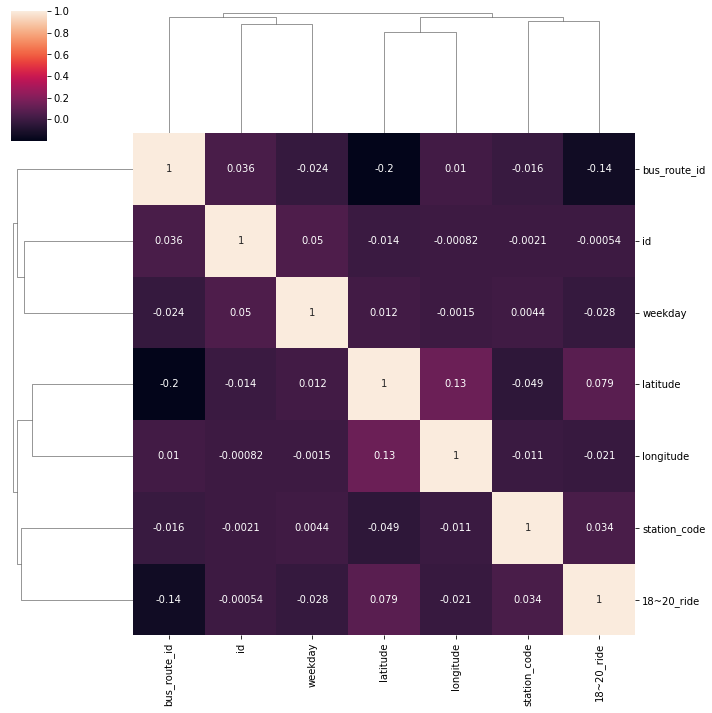

In [47]:
sns.clustermap(df, annot=True)

In [54]:
d = train[['id', 'date', 'bus_route_id', 'station_code', 'latitude', 'longitude', '18~20_ride']]
d

,id,date,bus_route_id,station_code,latitude,longitude,18~20_ride
0,0,2019-09-01,4270000,344,33.48990,126.49373,0.0
1,1,2019-09-01,4270000,357,33.48944,126.48508,5.0
2,2,2019-09-01,4270000,432,33.48181,126.47352,2.0
3,3,2019-09-01,4270000,1579,33.50577,126.49252,53.0
4,4,2019-09-01,4270000,1646,33.25579,126.41260,0.0
...,...,...,...,...,...,...,...
415418,415418,2019-09-30,32820000,1129,33.41437,126.26336,0.0
415419,415419,2019-09-30,32820000,1564,33.49946,126.51479,0.0
415420,415420,2019-09-30,32820000,2322,33.23100,126.26273,0.0
415421,415421,2019-09-30,32820000,3291,33.46483,126.31870,0.0


In [55]:
d["date"] = pd.to_datetime(d["date"])
d["weekday"] = d["date"].dt.weekday
d

/var/folders/xh/l577dxks7lg0ks4h2nw_tnd00000gn/T/ipykernel_94270/721938510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["date"] = pd.to_datetime(d["date"])
/var/folders/xh/l577dxks7lg0ks4h2nw_tnd00000gn/T/ipykernel_94270/721938510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["weekday"] = d["date"].dt.weekday


,id,date,bus_route_id,station_code,latitude,longitude,18~20_ride,weekday
0,0,2019-09-01,4270000,344,33.48990,126.49373,0.0,6
1,1,2019-09-01,4270000,357,33.48944,126.48508,5.0,6
2,2,2019-09-01,4270000,432,33.48181,126.47352,2.0,6
3,3,2019-09-01,4270000,1579,33.50577,126.49252,53.0,6
4,4,2019-09-01,4270000,1646,33.25579,126.41260,0.0,6
...,...,...,...,...,...,...,...,...
415418,415418,2019-09-30,32820000,1129,33.41437,126.26336,0.0,0
415419,415419,2019-09-30,32820000,1564,33.49946,126.51479,0.0,0
415420,415420,2019-09-30,32820000,2322,33.23100,126.26273,0.0,0
415421,415421,2019-09-30,32820000,3291,33.46483,126.31870,0.0,0


In [59]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415423 entries, 0 to 415422
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            415423 non-null  int64         
 1   date          415423 non-null  datetime64[ns]
 2   bus_route_id  415423 non-null  int64         
 3   station_code  415423 non-null  int64         
 4   latitude      415423 non-null  float64       
 5   longitude     415423 non-null  float64       
 6   18~20_ride    415423 non-null  float64       
 7   weekday       415423 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 25.4 MB


In [56]:
d.corr()

,id,bus_route_id,station_code,latitude,longitude,18~20_ride,weekday
id,1.000000,0.035830,-0.002053,-0.013783,-0.000816,-0.000544,0.050445
bus_route_id,0.035830,1.000000,-0.015897,-0.196758,0.010187,-0.143702,-0.023889
station_code,-0.002053,-0.015897,1.000000,-0.048951,-0.011303,0.034360,0.004411
latitude,-0.013783,-0.196758,-0.048951,1.000000,0.134208,0.079261,0.011928
longitude,-0.000816,0.010187,-0.011303,0.134208,1.000000,-0.021368,-0.001481
18~20_ride,-0.000544,-0.143702,0.034360,0.079261,-0.021368,1.000000,-0.028060
weekday,0.050445,-0.023889,0.004411,0.011928,-0.001481,-0.028060,1.000000


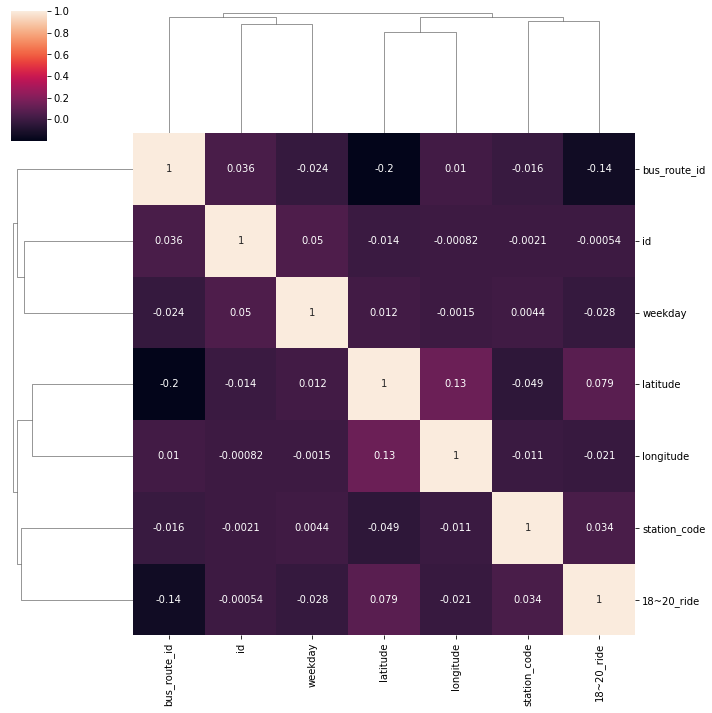

In [57]:
sns.clustermap(df, annot=True)

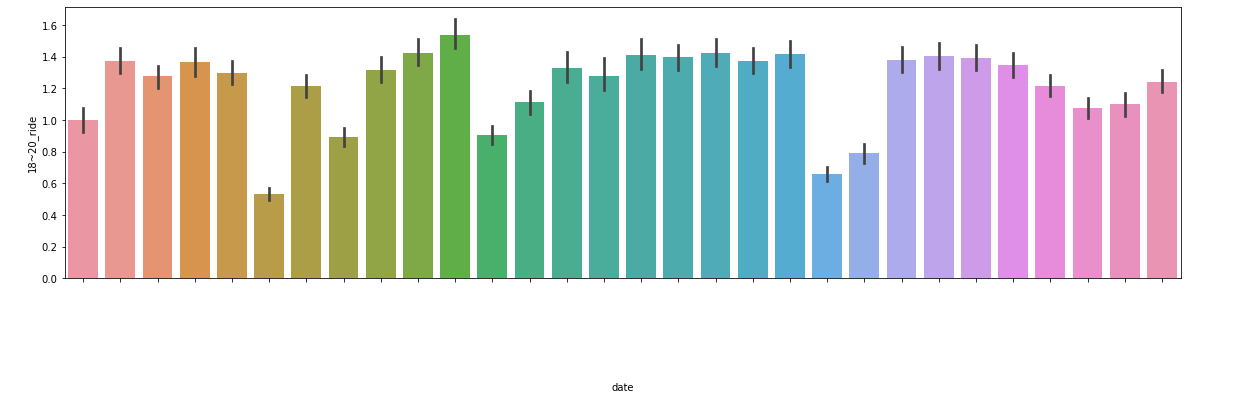

In [75]:
plt.figure(figsize=(20,5))
ax = sns.barplot(data=d, x='date', y='18~20_ride')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, color ="white")
plt.show()

In [78]:
!pip install geopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 1.9 MB/s eta 0:00:00a 0:00:01


In [82]:
import geopy.distance

coords_jeju = (33.500770, 126.522761)
coords_seogwipo = (33.259429, 126.558217)

d['dis_jeju'] = [geopy.distance.geodesic((d['latitude'].iloc[i],d['longitude'].iloc[i]), coords_jeju).km for i in range(len(d))]
d['dis_seogwipo'] = [geopy.distance.geodesic((d['latitude'].iloc[i],d['longitude'].iloc[i]), coords_seogwipo).km for i in range(len(d))]

d

/var/folders/xh/l577dxks7lg0ks4h2nw_tnd00000gn/T/ipykernel_94270/3458496777.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['dis_jeju'] = [geopy.distance.geodesic((d['latitude'].iloc[i],d['longitude'].iloc[i]), coords_jeju).km for i in range(len(d))]
/var/folders/xh/l577dxks7lg0ks4h2nw_tnd00000gn/T/ipykernel_94270/3458496777.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['dis_seogwipo'] = [geopy.distance.geodesic((d['latitude'].iloc[i],d['longitude'].iloc[i]), coords_seogwipo).km for i in range

,id,date,bus_route_id,station_code,latitude,longitude,18~20_ride,weekday,dis_jeju,dis_seogwipo
0,0,2019-09-01,4270000,344,33.48990,126.49373,0.0,6,2.954920,26.256744
1,1,2019-09-01,4270000,357,33.48944,126.48508,5.0,6,3.720275,26.403025
2,2,2019-09-01,4270000,432,33.48181,126.47352,2.0,6,5.036124,25.893305
3,3,2019-09-01,4270000,1579,33.50577,126.49252,53.0,6,2.864166,27.997494
4,4,2019-09-01,4270000,1646,33.25579,126.41260,0.0,6,29.040353,13.574693
...,...,...,...,...,...,...,...,...,...,...
415418,415418,2019-09-30,32820000,1129,33.41437,126.26336,0.0,0,25.950139,32.385460
415419,415419,2019-09-30,32820000,1564,33.49946,126.51479,0.0,0,0.754801,26.927069
415420,415420,2019-09-30,32820000,2322,33.23100,126.26273,0.0,0,38.482046,27.717482
415421,415421,2019-09-30,32820000,3291,33.46483,126.31870,0.0,0,19.380000,31.873252


In [93]:
d.describe()

,id,bus_route_id,station_code,latitude,longitude,18~20_ride,weekday,dis_jeju,dis_seogwipo
count,415423.000000,4.154230e+05,4.154230e+05,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000
mean,207711.000000,2.691935e+07,4.209311e+04,33.420375,126.533574,1.242095,2.719349,15.177921,23.218567
std,119922.434776,3.924652e+06,4.971504e+05,0.107996,0.140986,4.722287,2.017205,12.863242,10.030443
min,0.000000,4.270000e+06,1.000000e+00,33.208350,126.165040,0.000000,0.000000,0.135987,0.151798
25%,103855.500000,2.346000e+07,3.200000e+02,33.291080,126.475780,0.000000,1.000000,3.350771,21.316234
50%,207711.000000,2.803000e+07,1.130000e+03,33.478850,126.529770,0.000000,3.000000,9.927686,26.401464
75%,311566.500000,3.003000e+07,2.226000e+03,33.500020,126.575890,1.000000,4.000000,28.042982,28.361866
max,415422.000000,3.282000e+07,6.115101e+06,33.963640,126.965670,272.000000,6.000000,55.446403,81.788361


<AxesSubplot:ylabel='dis_jeju'>

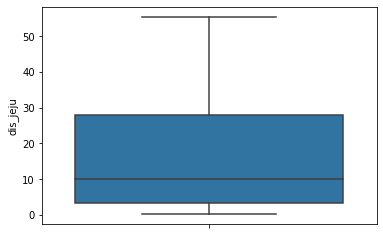

In [96]:
sns.boxplot(data=d, y='dis_jeju')

<AxesSubplot:ylabel='dis_seogwipo'>

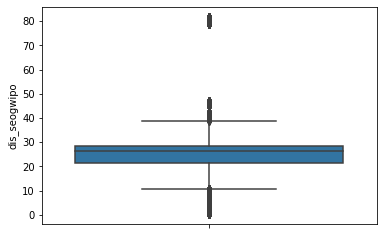

In [97]:
sns.boxplot(data=d, y='dis_seogwipo')

In [92]:
df = d.corr()

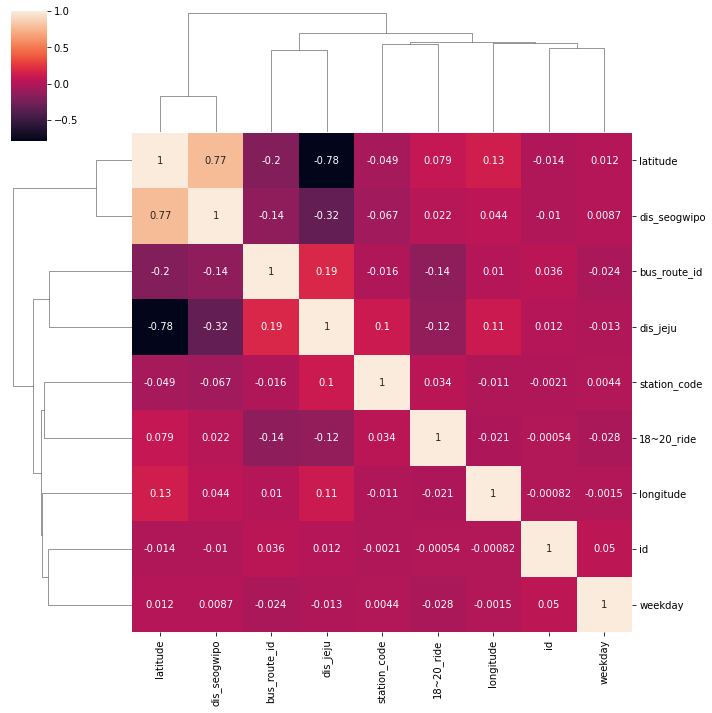

In [90]:
sns.clustermap(df, annot=True)

In [35]:
data = data.rename(columns={'variable':'time','value':'count'})

In [36]:
#ride / takeoff를 구분하는 칼럼 생성
data['type'] = data['time'].apply(lambda x : x.split('_')[1])

### 요일별 시각화

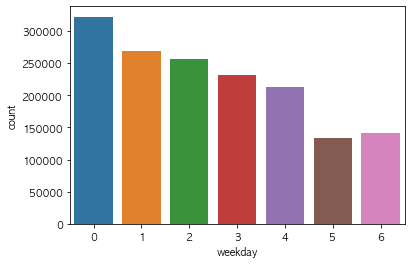

In [37]:
# 월요일이 가장 많음. 주말엔 적어짐.
weekday = data[data['type']=='ride'].groupby('weekday').sum().reset_index()[['weekday','count']]
sns.barplot(data = weekday, x = 'weekday', y = 'count')

### 시간대별 승차 인원 수

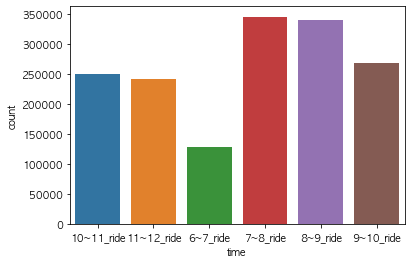

In [39]:
time = data[data['type']=='ride'].groupby('time').sum().reset_index()[['time','count']]
sns.barplot(data = time, x = 'time', y = 'count')